Binning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('train.csv',usecols=['Age', 'Fare', 'Survived'])

In [5]:
#dropping the null values
df.dropna(inplace=True)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#fitting the model without any transformation
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.6293706293706294


In [10]:
#checking for cross validation
np.mean(cross_val_score(clf, x, y, cv=10))

np.float64(0.6288928012519561)

In [20]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [21]:
trf = ColumnTransformer(transformers=[('age', kbin_age, [0]), ('fare', kbin_fare, [1])])

In [22]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [23]:
#checking the intervals
trf.named_transformers_['age'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [24]:
#creating a dataframe with having the data, transformed data and the intervals
output = pd.DataFrame({
    'age': x_train['Age'],
    'age_transformed': x_train_trf[:, 0],
    'fare': x_train['Fare'],
    'fare_transformed': x_train_trf[:, 1]
})

In [25]:
output['age_interval'] = pd.cut(output['age'], bins=trf.named_transformers_['age'].bin_edges_[0], include_lowest=True)
output['fare_interval'] = pd.cut(output['fare'], bins=trf.named_transformers_['fare'].bin_edges_[0], include_lowest=True)

In [26]:
output.head()

,age,age_transformed,fare,fare_transformed,age_interval,fare_interval
328,31.0,8.0,20.5250,8.0,"(30.0, 32.0]","(18.75, 26.0]"
73,26.0,6.0,14.4542,7.0,"(25.0, 28.0]","(13.0, 14.454]"
253,30.0,8.0,16.1000,7.0,"(28.0, 30.0]","(14.454, 18.75]"
719,33.0,9.0,7.7750,2.0,"(32.0, 35.0]","(7.25, 7.775]"
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"


In [27]:
#fitting the model with transformed data
clf = DecisionTreeClassifier()
clf.fit(x_train_trf, y_train)

y_pred = clf.predict(x_test_trf)

print(accuracy_score(y_test, y_pred))

0.6363636363636364


In [33]:
def descretize(bins,startegy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=startegy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=startegy)

    trf = ColumnTransformer(transformers=[('age', kbin_age, [0]), ('fare', kbin_fare, [1])])

    x_transformed = trf.fit_transform(x)
    print(np.mean(cross_val_score(clf, x_transformed, y, cv=10)))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_transformed[:, 0],color='red')
    plt.title('After')

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_transformed[:, 1],color='red')
    plt.title('After')

    plt.show()

0.6541275430359936


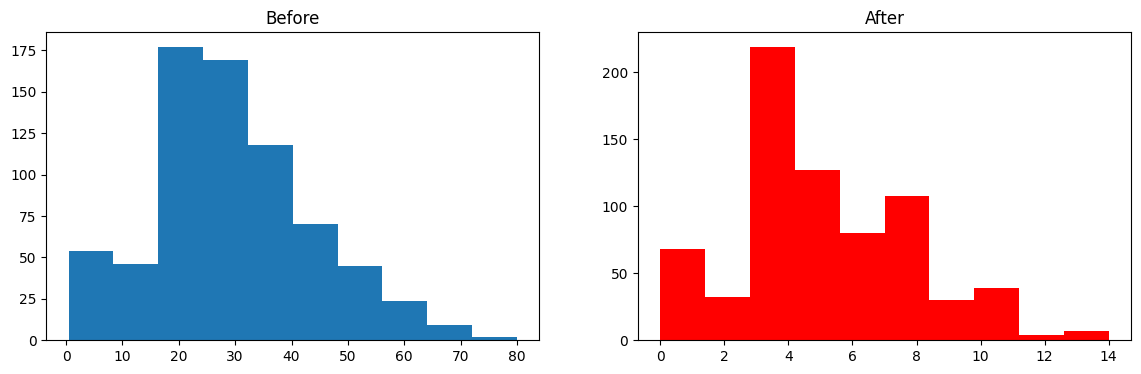

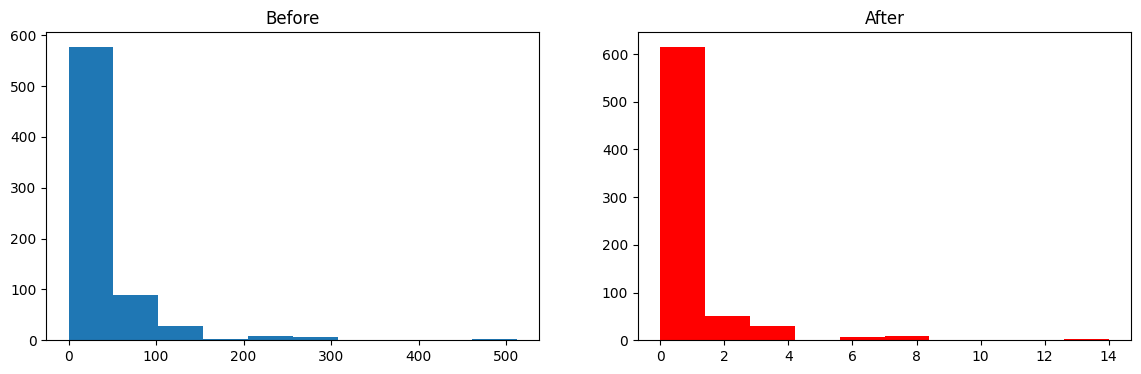

In [34]:
descretize(15,'uniform')

Binnarization

In [36]:
df = pd.read_csv('train.csv',usecols=['Age', 'Fare', 'Parch','SibSp','Survived'])

In [38]:
df.dropna(inplace=True)

In [39]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [40]:
df['family'] = df['Parch'] + df['SibSp']

In [42]:
df.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [43]:
df.drop(['Parch','SibSp'],axis=1,inplace=True)

In [44]:
df.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [45]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [46]:
x.head()

,Age,Fare,family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
#fitting the model without any transformation
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.6293706293706294


In [49]:
np.mean(cross_val_score(clf, x, y, cv=10))

np.float64(0.6457550860719874)

In [50]:
#Applying the binnarization
from sklearn.preprocessing import Binarizer

In [55]:
#creting the transformer
trf = ColumnTransformer(
    transformers=[
        ('bins', Binarizer(copy=False), ['family'])
    ],
    remainder='passthrough'
)

In [56]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [57]:
pd.DataFrame(x_train_transformed,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [58]:
#fitting the model with transformed data
clf = DecisionTreeClassifier()
clf.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)

print(accuracy_score(y_test, y_pred))

0.6083916083916084


In [59]:
np.mean(cross_val_score(clf, x, y, cv=10))

np.float64(0.6470852895148669)